<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Supervised-Learning/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
!gdown 1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8

Downloading...
From: https://drive.google.com/uc?id=1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8
To: /content/spam_clean.csv
100% 484k/484k [00:00<00:00, 93.9MB/s]


In [ ]:
df = pd.read_csv('spam_clean.csv', encoding='latin-1')
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.head(10)

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
df['type'].value_counts(normalize = True)

ham     0.865937
spam    0.134063
Name: type, dtype: float64

In [ ]:
# Pre-processing
# 1. Tokenization


# "Hi my name is Anthony Gonsalves."

# ['Hi', 'my', 'name', 'is', 'Anthony' ,'Gonsalves']

# 2. Lowercase


# 3. remove punctuations

# 4. stopwords removal.

# 5. Stemming.


# nltk -> natural language toolkit

In [ ]:
import re, nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk import word_tokenize
from nltk.corpus import stopwords

def clean_sentence(s):
    """Performs basic cleaning of a tokenized sentence"""

    cleaned_s = ""  # Create empty string to store processed sentence.
    words = nltk.word_tokenize(s)
    for word in words:
        # Convert to lowercase #
        c_word = word.lower()
        # Remove punctuations #
        c_word = re.sub(r'[^\w\s]', '', c_word)
        # Remove stopwords #
        if c_word != '' and c_word not in stopwords.words('english'):
            cleaned_s = cleaned_s + " " + c_word    # Append processed words to new list.
    return(cleaned_s.strip())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_sentence("I, nigeran prince !!!!...@@ need your, help. send mONEy soon. ")

'nigeran prince need help send money soon'

In [ ]:
sw = stopwords.words('english')
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
clean_sentence("i dont need money")

'dont need money'

In [ ]:
df["cleaned_message"] = df["message"].apply(clean_sentence)
df.head(10)

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 week word back like fun ...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile 11 months u r entitled update latest co...


In [ ]:
ham = " ".join(df[df['type'] == 'ham']['cleaned_message'])
spam = " ".join(df[df['type'] == 'spam']['cleaned_message'])

In [ ]:
ham = ham.split()
ham[:10]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la']

In [ ]:
counter_ham = Counter(ham).most_common(20)
counter_ham

[('u', 1004),
 ('nt', 360),
 ('gt', 318),
 ('lt', 316),
 ('2', 309),
 ('get', 303),
 ('ok', 279),
 ('go', 248),
 ('got', 244),
 ('ur', 241),
 ('know', 236),
 ('like', 231),
 ('call', 231),
 ('good', 229),
 ('come', 227),
 ('time', 197),
 ('day', 192),
 ('love', 191),
 ('4', 172),
 ('going', 169)]

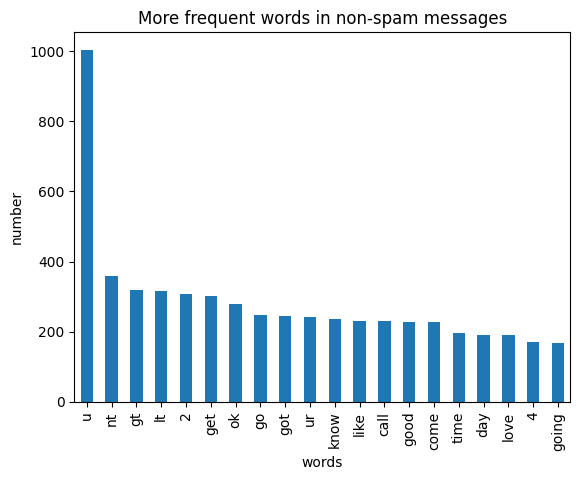

In [ ]:
# load the results as a pandas dataframe in order to plot
df_ham = pd.DataFrame(counter_ham)

# Renaming the columns in this dataframe
df_ham = df_ham.rename(columns={0:"words in non-spam", 1:"count"})

# Plotting the data
df_ham.plot.bar(legend = False)
y_pos = np.arange(len(df_ham["words in non-spam"]))
plt.xticks(y_pos, df_ham["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

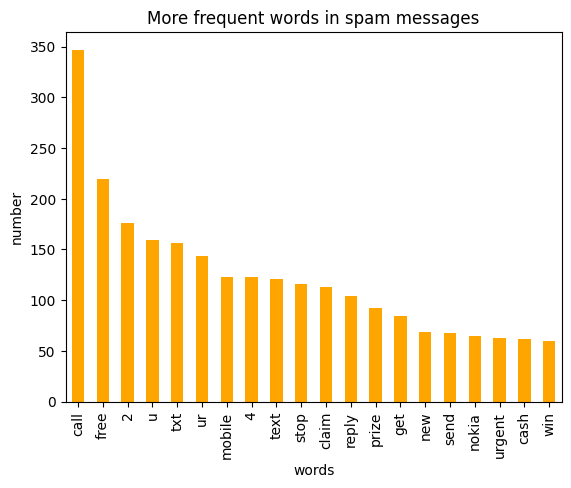

In [ ]:
counter_spam = Counter(" ".join(df[df['type']=='spam']["cleaned_message"]).split()).most_common(20)

# load the results as a pandas dataframe in order to plot
df_spam = pd.DataFrame(counter_spam)

# Renaming the columns in this dataframe
df_spam = df_spam.rename(columns={0:"words in spam", 1:"count_"})

# Plotting the data
df_spam.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df_spam["words in spam"]))
plt.xticks(y_pos, df_spam["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [ ]:
df.head()

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though


In [ ]:
# 1. spam emails
# 2. create a big paragraph of all spam emails
# 3. found all the words are in spam emails
# 4. counter -> most_common

In [ ]:
df["type"] = df["type"].map({'spam':1,'ham':0})
df.head()

,type,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though


In [ ]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

[(4179,), (1393,)]


In [ ]:
df_X_train.head(10)

4281                                               u call
585             tell u headache want use 1 hour sick time
4545    never try alone take weight tear comes ur hear...
3034    raji pls favour pls convey birthday wishes nim...
2758                                      time iûm prob 3
777     hi kate lovely see tonight ill phone tomorrow ...
2600                        usual iam fine happy amp well
1018                  nope watching tv home going v bored
2182                                  ps u ur grown right
2784                                   k wat tht incident
Name: cleaned_message, dtype: object

In [ ]:
spam = df[df['type'] == 1]
spam.head()

,type,message,cleaned_message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
5,1,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 week word back like fun ...
8,1,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,1,Had your mobile 11 months or more? U R entitle...,mobile 11 months u r entitled update latest co...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",six chances win cash 100 20000 pounds txt csh1...


In [ ]:
spam['cleaned_message'].str.contains('free').sum()/ len(spam)

0.26639892904953144

In [ ]:
ham = df[df['type'] == 0]
ham.head()

,type,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
6,0,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent


In [ ]:
ham['cleaned_message'].str.contains('free').sum()/ len(ham)

0.013678756476683937